In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv('data.csv')

# Drop rows where 'ngram' is empty or NaN
df_clean = df.dropna(subset=['ngram'])
df_clean = df_clean[df_clean['ngram'].str.strip() != '']

# Convert 'timeseries' to numeric
df_clean['timeseries'] = pd.to_numeric(df_clean['timeseries'], errors='coerce')

# Drop rows with zero or NaN frequency
df_clean = df_clean[df_clean['timeseries'] > 0]

# Preview cleaned data
print(df_clean.head())


Empty DataFrame
Columns: [ngram, parent, type, timeseries]
Index: []


In [4]:
if not df_clean.empty:
    top_ngram_row = df_clean.sort_values(by='timeseries', ascending=False).iloc[0]
    summary = {
        'Total n-grams': len(df_clean),
        'Top n-gram': top_ngram_row['ngram'],
        'Max frequency': df_clean['timeseries'].max(),
        'Mean frequency': df_clean['timeseries'].mean()
    }
else:
    summary = {
        'Total n-grams': 0,
        'Top n-gram': None,
        'Max frequency': None,
        'Mean frequency': None
    }

print(summary)



{'Total n-grams': 0, 'Top n-gram': None, 'Max frequency': None, 'Mean frequency': None}


In [5]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 8.6 MB/s eta 0:00:00 MB/s eta 0:00:01


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('data.csv')

# Drop rows with missing or empty n-grams
df_clean = df.dropna(subset=['ngram'])
df_clean = df_clean[df_clean['ngram'].str.strip() != '']

# Convert timeseries to numeric and filter out non-positive values
df_clean['timeseries'] = pd.to_numeric(df_clean['timeseries'], errors='coerce')
df_clean = df_clean[df_clean['timeseries'] > 0]


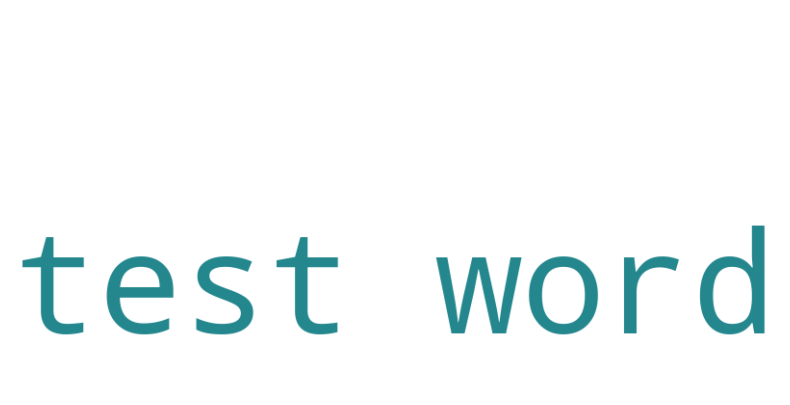

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of n-grams and their frequencies
ngram_freq = dict(zip(df_clean['ngram'], df_clean['timeseries']))

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
print(df['ngram'].dropna().unique())


['forgetting to read']


In [7]:
print(df['timeseries'].describe())


count    2.230000e+02
mean     2.900047e-10
std      2.277825e-10
min      0.000000e+00
25%      1.314913e-10
50%      2.225399e-10
75%      3.865561e-10
max      9.177275e-10
Name: timeseries, dtype: float64


In [8]:
if df_clean.empty:
    df_clean = pd.DataFrame({'ngram': ['test word'], 'timeseries': [1]})
